# Exploratory Data Analysis: Hitters Baseball Datasat

# Business Problem

This study aims to perform exploratory data analysis using the ditters baseball dataset

# Dataset Story

Description
Major League Baseball Data from the 1986 and 1987 seasons.

Usage
Hitters

Format
A data frame with 322 observations of major league players on the following 20 variables.

AtBat: Number of times at bat in 1986

Hits: Number of hits in 1986

HmRun: Number of home runs in 1986

Runs: Number of runs in 1986

RBI: Number of runs batted in in 1986

Walks: Number of walks in 1986

Years: Number of years in the major leagues

CAtBat: Number of times at bat during his career

CHits: Number of hits during his career

CHmRun: Number of home runs during his career

CRuns: Number of runs during his career

CRBI: Number of runs batted in during his career

CWalks: Number of walks during his career

League: A factor with levels A and N indicating player's league at the end of 1986

Division: A factor with levels E and W indicating player's division at the end of 1986

PutOuts: Number of put outs in 1986

Assists: Number of assists in 1986

Errors: Number of errors in 1986

Salary: 1987 annual salary on opening day in thousands of dollars

NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987

Source
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

References
Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York

Examples
summary(Hitters)

lm(Salary~AtBat+Hits,data=Hitters)
Dataset imported from https://www.r-project.org.

# Import Necessary Libraries

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Import Dataset

In [100]:
def load_dataset(path):
    df = pd.read_csv(path)
    return df

# General Information About to Dataset

In [101]:
def check_df(dataframe, head=5):
    print(20*"#", "Head", 20*"#")
    print(dataframe.head(head))
    print(20*"#", "Tail", 20*"#")
    print(dataframe.tail(head))
    print(20*"#", "Shape", 20*"#")
    print(dataframe.shape)
    print(20*"#", "Type", 20*"#")
    print(dataframe.dtypes)
    print(20*"#", "NA", 20*"#")
    print(dataframe.isnull().sum())
    print(20*"#", "Quartiles", 20*"#")
    print(dataframe.describe([0, 0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99, 1]).T)

# Analysis of Categorical and Numerical Columns

In [102]:
def grab_col_names(dataframe, cat_th=10, car_th=20, report=False):
    # categorical
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique()<cat_th and str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()>car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = num_but_cat + cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # numerical
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"] and col not in cat_cols]
    
    if report:
        print(f"Observation: {dataframe.shape[0]}")
        print(f"Variables: {dataframe.shape[1]}")
        print(f"Cat Cols: {len(cat_cols)}")
        print(f"Num Cols: {len(num_cols)}")
        print(f"Cat But Car Cols: {len(cat_but_car)}")
        print(f"Num but Cat Cols: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [103]:
def cat_summary(dataframe, col_name, plot=False):
    print(20*"#",col_name,20*"#")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                 "Ratio":100* dataframe[col_name].value_counts()/ len(dataframe)}))
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [104]:
def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in cat_cols:
        if str(dataframe[col].dtypes) == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype(int)
            cat_summary(new_df, col, plot=True)
        else:
            cat_summary(dataframe, col, plot=True)

In [105]:
def num_summary(dataframe, num_col, plot=False):
    print(20*"#", num_col, 20*"#")
    quartiles = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    print(dataframe[num_col].describe(quartiles).T)
    
    if plot:
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

In [106]:
def num_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

In [107]:
def plot_num_summary(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    num_plots = len(num_cols)
    rows = math.ceil(num_plots/2)
    cols = 2 if num_plots > 1 else 1
    plt.figure(figsize=(10*cols,4*rows))
    for index, col in enumerate(num_cols):
        plt.subplot(rows, cols, index+1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

# Target Analysis

In [108]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(20*"#", target, "==>", numerical_col, 20*"#")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

In [109]:
def target_summary_with_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        target_summary_with_num(dataframe, target, col)

In [110]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(20*"#", target, "==>", categorical_col, 20*"#")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(categorical_col)[target].mean()}))

In [111]:
def target_summary_with_cat_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in cat_cols:
        target_summary_with_cat(dataframe, target, col)

# Correlation Analysis

In [112]:
def high_corralated_cols(dataframe, corr_th=0.90, plot=False, remove=False):
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)] 
    if drop_list == []:
        print(20*"#", "After Correlation Anlysis, You Don't Need to Remove Variables", 20*"#")
    if remove:
        dataframe = dataframe.drop(drop_list, axis=1)
        num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    if plot:
        sns.set(rc={'figure.figsize': (6,3)})
        sns.heatmap(dataframe[num_cols].corr(), cmap="RdBu", annot=True, fmt=".2f")
        plt.show(block=True)
    
    return drop_list

# Pipeline

In [113]:
def main(path_dataset, target, head=5, cat_th=10, car_th=20, report=False, corr_th=0.90, plot=False, remove=False):
    df = load_dataset(path_dataset)
    print(20*"#", "General Information About To Dataset")
    check_df(df, head)
    print(20*"#", "Analysis of Categorical and Numerical Variables")
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df, cat_th=cat_th, car_th=car_th, report=report)
    cat_summary_df(df)
    num_summary_df(df)
    print(20*"#", "Target Analysis", 20*"#")
    if len(num_cols)>1:
        print(20*"#", "Target Analysis - Numerical", 20*"#")
        target_summary_with_num_df(df, target)
    if len(cat_cols)>1:
        print(20*"#", "Target Analysis - Categorical", 20*"#")
        target_summary_with_cat_df(df, target)
    print(20*"#", "Correlation Analysis", 20*"#")
    drop_list = high_corralated_cols(df, corr_th=corr_th, plot=plot, remove=remove)
    print(20*"#", "Plot All Numerical Variables", 20*"#")
    plot_num_summary(df)

#################### General Information About To Dataset

#################### Head ####################

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague

0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A

1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        W      632       43      10 475.000         N

2    479   130     18    66   72     76      3    1624    457      63    224   266     263      A        W      880       82      14 480.000         A

3    496   141     20    65   78     37     11    5628   1575     225    828   838     354      N        E      200       11       3 500.000         N

4    321    87     10    39   42     30      2     396    101      12     48    46      33      N        E      805       40       4 

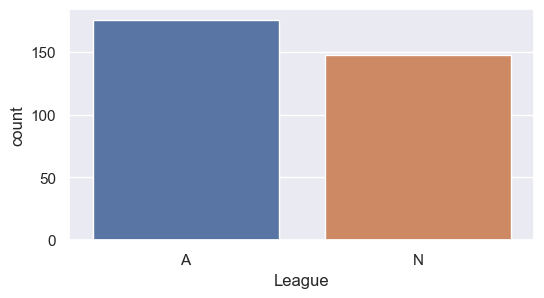

#################### Division ####################

          Division  Ratio

Division                 

W              165 51.242

E              157 48.758


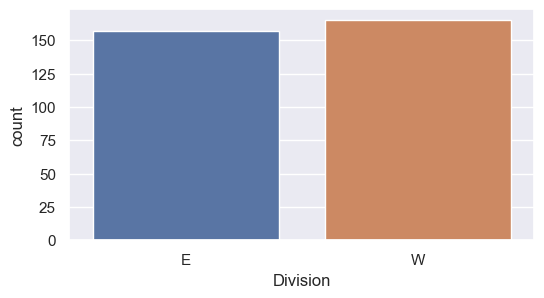

#################### NewLeague ####################

           NewLeague  Ratio

NewLeague                  

A                176 54.658

N                146 45.342


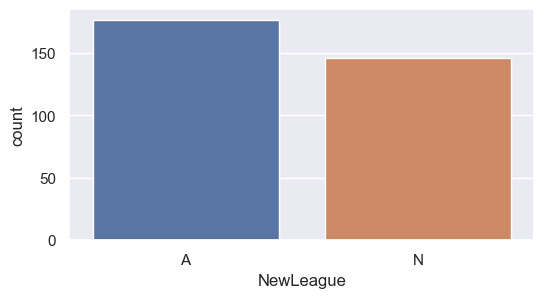

#################### AtBat ####################

count   322.000

mean    380.929

std     153.405

min      16.000

1%       20.420

5%      161.000

10%     194.100

20%     221.800

30%     281.300

40%     321.800

50%     379.500

60%     430.200

70%     490.000

80%     535.600

90%     584.900

95%     609.900

99%     658.590

max     687.000

Name: AtBat, dtype: float64


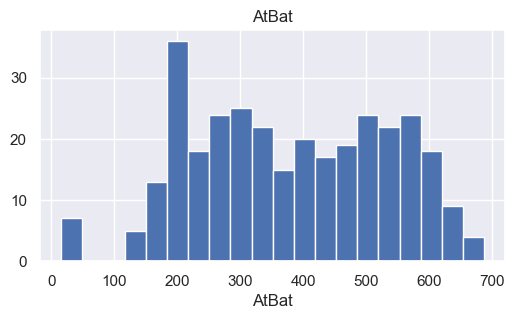

#################### Hits ####################

count   322.000

mean    101.025

std      46.455

min       1.000

1%        4.420

5%       39.000

10%      45.100

20%      57.000

30%      70.000

40%      82.000

50%      96.000

60%     113.000

70%     128.700

80%     144.000

90%     163.000

95%     174.000

99%     210.790

max     238.000

Name: Hits, dtype: float64


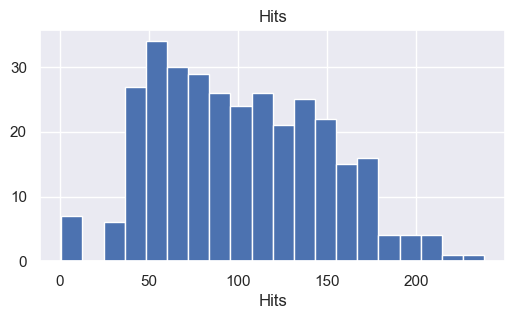

#################### HmRun ####################

count   322.000

mean     10.770

std       8.709

min       0.000

1%        0.000

5%        0.000

10%       1.000

20%       3.000

30%       5.000

40%       6.000

50%       8.000

60%      10.600

70%      14.000

80%      18.000

90%      24.000

95%      28.950

99%      33.000

max      40.000

Name: HmRun, dtype: float64


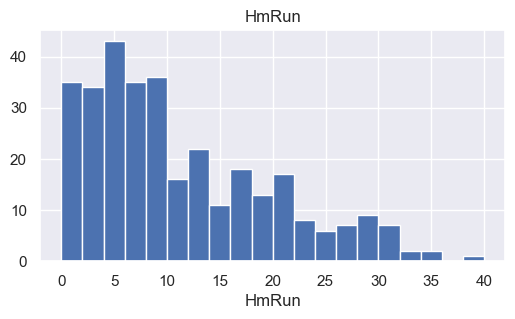

#################### Runs ####################

count   322.000

mean     50.910

std      26.024

min       0.000

1%        1.210

5%       17.000

10%      20.100

20%      27.000

30%      33.000

40%      41.000

50%      48.000

60%      55.600

70%      66.000

80%      75.800

90%      89.000

95%      94.000

99%     107.790

max     130.000

Name: Runs, dtype: float64


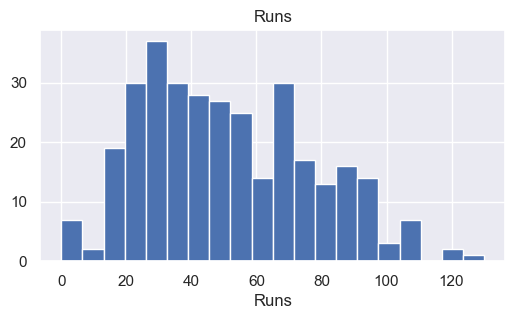

#################### RBI ####################

count   322.000

mean     48.028

std      26.167

min       0.000

1%        2.000

5%       14.000

10%      19.000

20%      26.000

30%      30.000

40%      36.400

50%      44.000

60%      49.000

70%      58.000

80%      73.000

90%      86.000

95%      96.000

99%     112.370

max     121.000

Name: RBI, dtype: float64


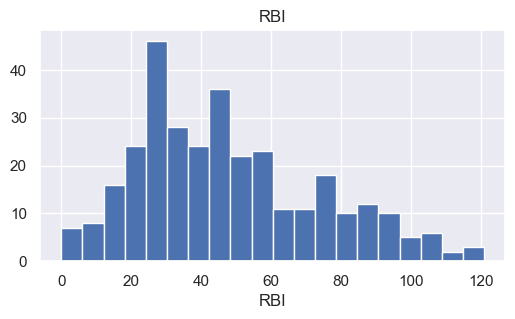

#################### Walks ####################

count   322.000

mean     38.742

std      21.639

min       0.000

1%        1.000

5%       11.050

10%      15.000

20%      20.000

30%      24.000

40%      30.000

50%      35.000

60%      40.000

70%      48.700

80%      59.000

90%      69.900

95%      78.000

99%      93.580

max     105.000

Name: Walks, dtype: float64


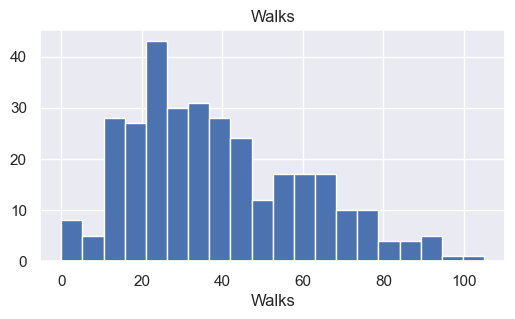

#################### Years ####################

count   322.000

mean      7.444

std       4.926

min       1.000

1%        1.000

5%        1.000

10%       2.000

20%       3.000

30%       4.000

40%       5.000

50%       6.000

60%       7.600

70%      10.000

80%      12.000

90%      15.000

95%      17.000

99%      19.790

max      24.000

Name: Years, dtype: float64


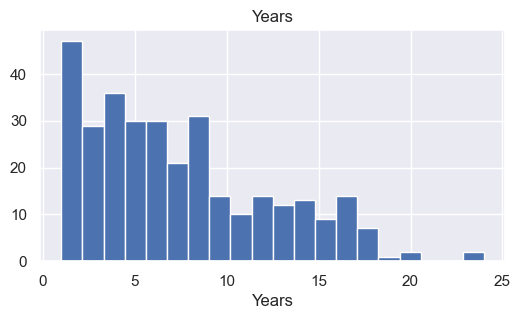

#################### CAtBat ####################

count     322.000

mean     2648.683

std      2324.206

min        19.000

1%         41.000

5%        216.500

10%       342.200

20%       667.600

30%       963.400

40%      1402.200

50%      1928.000

60%      2654.000

70%      3365.000

80%      4483.000

90%      6123.400

95%      7125.600

99%      8749.970

max     14053.000

Name: CAtBat, dtype: float64


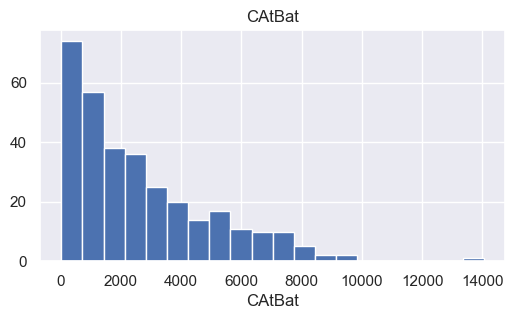

#################### CHits ####################

count    322.000

mean     717.571

std      654.473

min        4.000

1%         9.840

5%        54.000

10%       86.000

20%      164.600

30%      238.000

40%      355.800

50%      508.000

60%      708.200

70%      911.100

80%     1229.200

90%     1659.600

95%     2017.150

99%     2500.340

max     4256.000

Name: CHits, dtype: float64


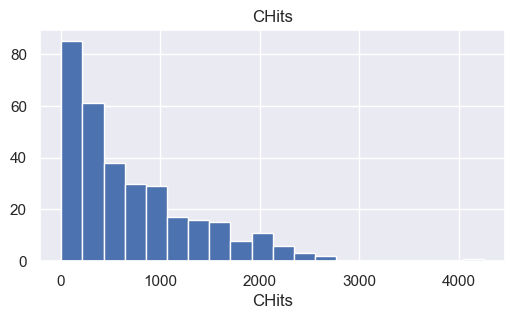

#################### CHmRun ####################

count   322.000

mean     69.491

std      86.266

min       0.000

1%        0.000

5%        2.000

10%       4.000

20%      10.200

30%      16.300

40%      27.400

50%      37.500

60%      51.200

70%      72.400

80%     103.800

90%     194.900

95%     265.650

99%     373.120

max     548.000

Name: CHmRun, dtype: float64


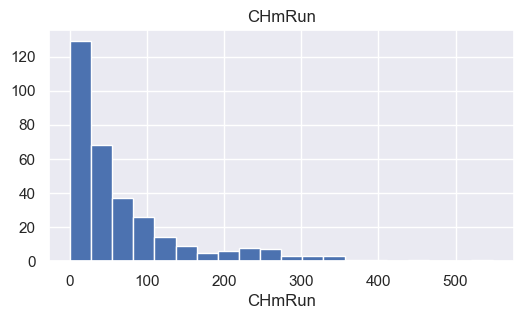

#################### CRuns ####################

count    322.000

mean     358.795

std      334.106

min        1.000

1%         3.630

5%        27.000

10%       38.100

20%       80.400

30%      117.300

40%      181.000

50%      247.000

60%      333.000

70%      443.400

80%      627.200

90%      895.700

95%     1032.300

99%     1174.370

max     2165.000

Name: CRuns, dtype: float64


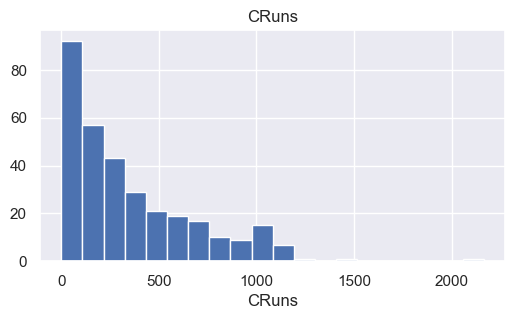

#################### CRBI ####################

count    322.000

mean     330.118

std      333.220

min        0.000

1%         4.630

5%        22.050

10%       34.100

20%       70.200

30%      106.300

40%      149.000

50%      220.500

60%      303.600

70%      379.100

80%      496.200

90%      861.600

95%     1071.750

99%     1310.850

max     1659.000

Name: CRBI, dtype: float64


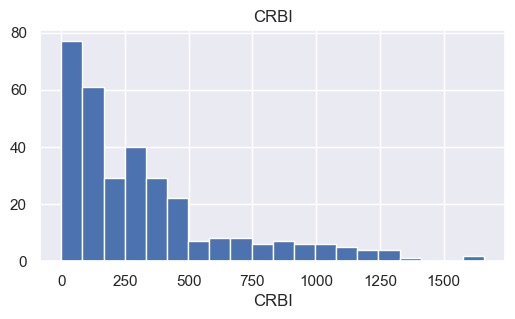

#################### CWalks ####################

count    322.000

mean     260.239

std      267.058

min        0.000

1%         4.000

5%        15.050

10%       30.100

20%       55.000

30%       82.000

40%      117.400

50%      170.500

60%      226.600

70%      300.700

80%      421.000

90%      643.900

95%      817.600

99%     1139.140

max     1566.000

Name: CWalks, dtype: float64


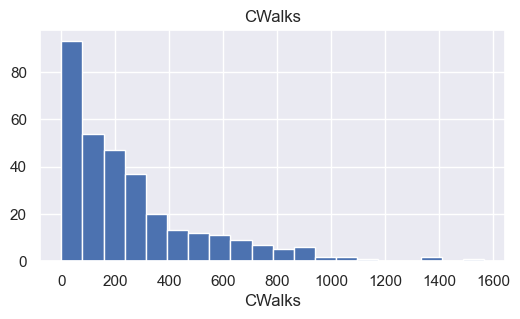

#################### PutOuts ####################

count    322.000

mean     288.938

std      280.705

min        0.000

1%         0.000

5%        33.200

10%       62.200

20%       99.600

30%      132.000

40%      167.000

50%      212.000

60%      257.400

70%      303.000

80%      365.800

90%      685.600

95%      910.650

99%     1301.190

max     1378.000

Name: PutOuts, dtype: float64


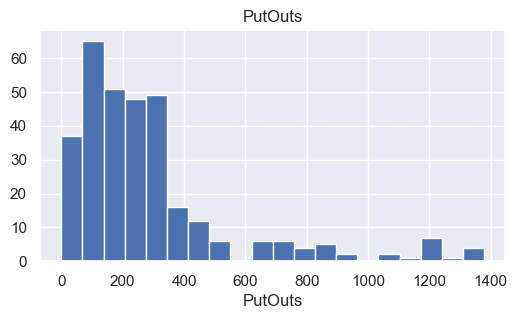

#################### Assists ####################

count   322.000

mean    106.913

std     136.855

min       0.000

1%        0.000

5%        0.000

10%       2.000

20%       5.200

30%       9.000

40%      15.400

50%      39.500

60%      76.800

70%     134.800

80%     210.800

90%     353.300

95%     431.450

99%     478.160

max     492.000

Name: Assists, dtype: float64


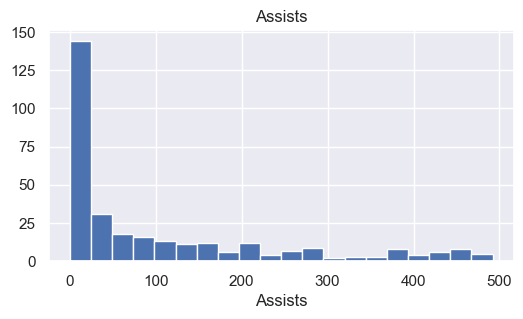

#################### Errors ####################

count   322.000

mean      8.040

std       6.368

min       0.000

1%        0.000

5%        0.000

10%       1.000

20%       3.000

30%       4.000

40%       5.000

50%       6.000

60%       8.000

70%      10.000

80%      13.000

90%      17.000

95%      20.000

99%      25.790

max      32.000

Name: Errors, dtype: float64


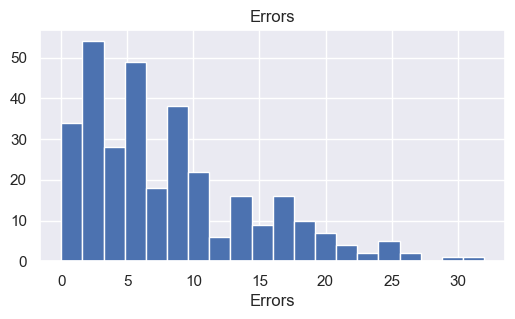

#################### Salary ####################

count    263.000

mean     535.926

std      451.119

min       67.500

1%        70.000

5%        86.600

10%      100.000

20%      155.000

30%      221.000

40%      300.000

50%      425.000

60%      538.000

70%      700.000

80%      809.000

90%     1048.667

95%     1346.000

99%     2032.887

max     2460.000

Name: Salary, dtype: float64


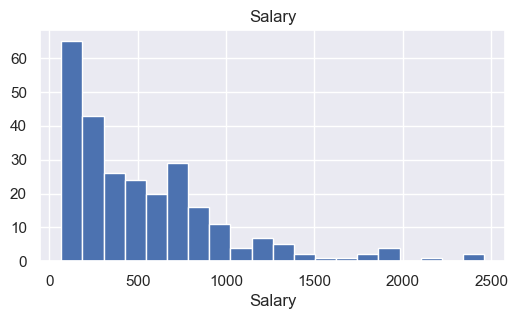

#################### Target Analysis ####################

#################### Target Analysis - Numerical ####################

#################### Salary ==> AtBat ####################

          Target Mean

Salary               

67.500        181.000

68.000        209.000

70.000        248.600

75.000        236.400

80.000        399.000

86.500        181.000

87.500        445.000

90.000        321.833

91.500        321.000

95.000        151.000

97.500        382.000

100.000       384.167

105.000       487.000

110.000       323.000

115.000       426.000

120.000       309.500

125.000       328.000

130.000       309.000

135.000       294.000

137.000       258.000

140.000       352.000

145.000       424.500

150.000       423.000

155.000       456.000

160.000       589.000

165.000       596.500

172.000       540.000

175.000       346.000

180.000       217.000

185.000       520.000

190.000       181.000

191.000       275.000

195.000       453.000

200.0

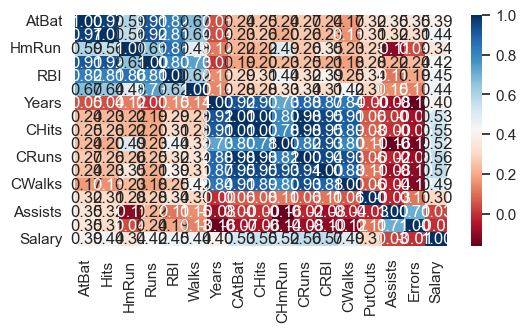

#################### Plot All Numerical Variables ####################


C:\Users\Ecrin\AppData\Local\Temp\ipykernel_19704\3252032132.py:9: UserWarning: The figure layout has changed to tight

  plt.tight_layout()


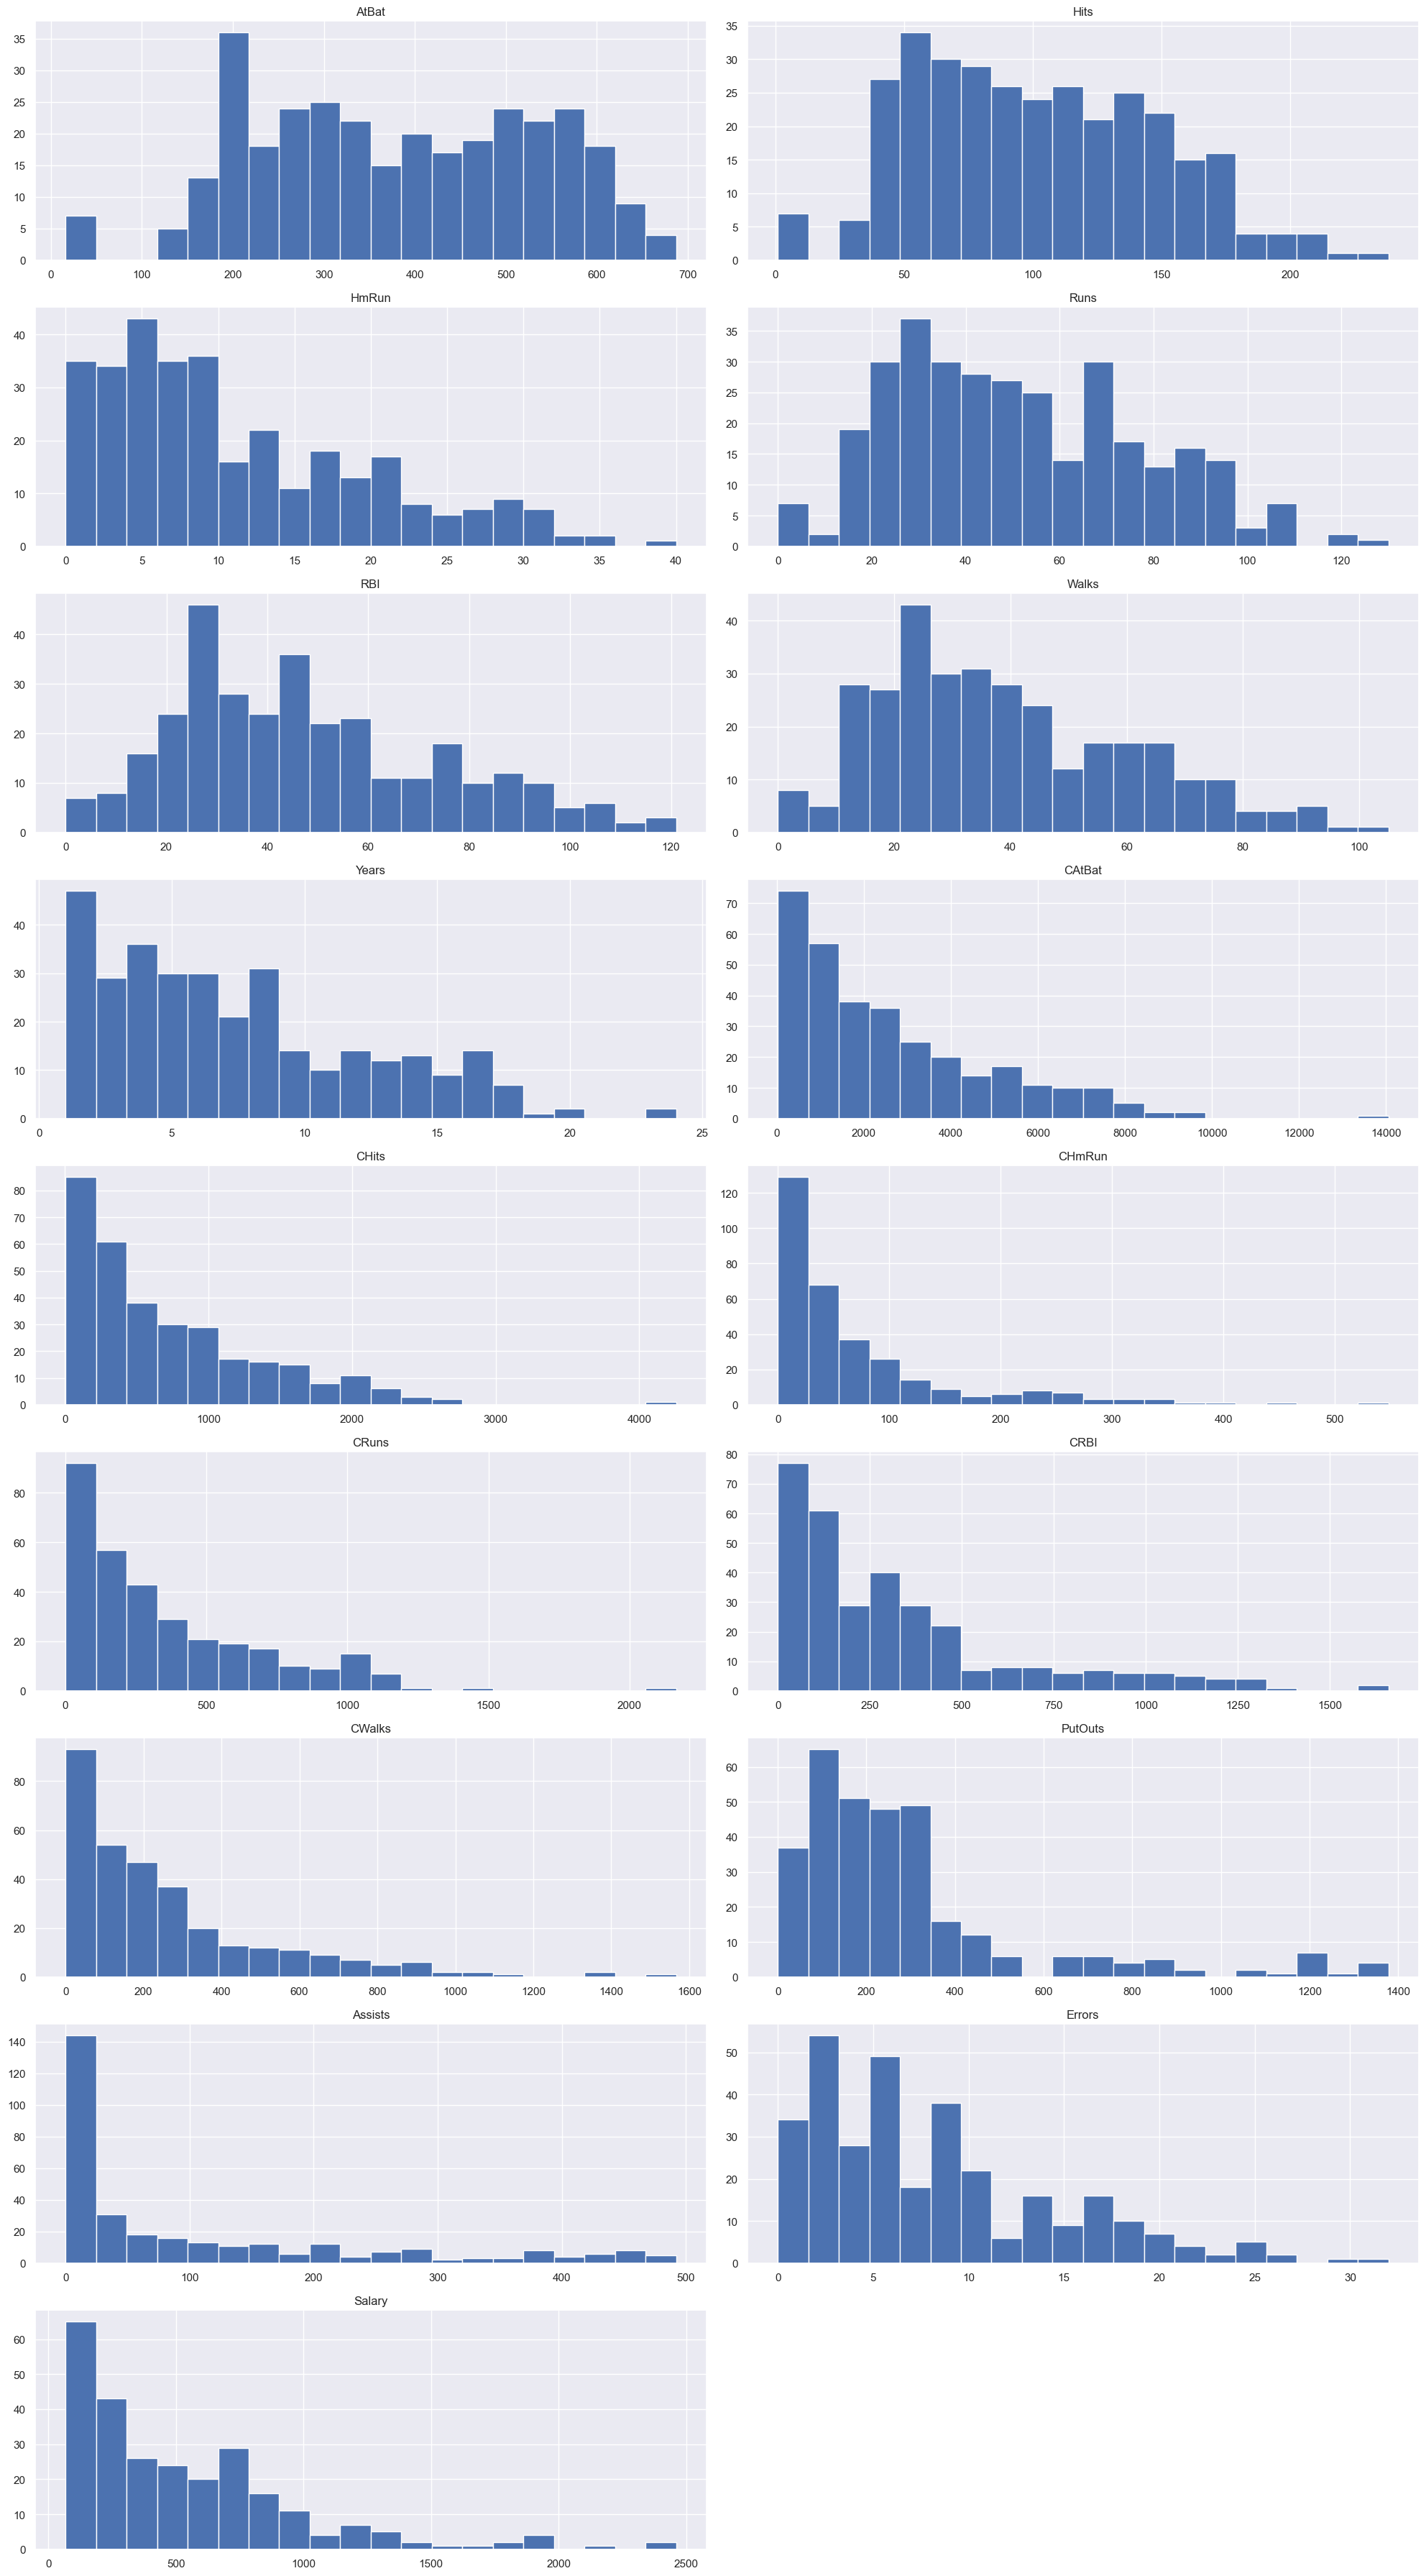

In [114]:
if __name__ == "__main__":
    main("Hitters.csv", "Salary", report=True, plot= True)